# 数据规整化：清理、转换、合并、重塑
- 利用Python进行数据分析 第七章

In [132]:
from pandas import DataFrame,Series
import pandas as pd

import numpy as np
from IPython.display import Image

import re

## 一、合并数据集
* 合并（merge）、链接（join）

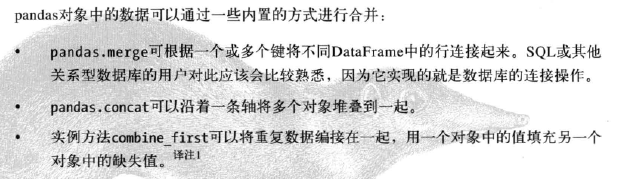

In [3]:
Image(filename="picture\Combining and Merging Data Sets.png")

### 1 数据库风格的DataFrame合并

In [11]:
df1 = DataFrame({'key':['b','b','a','c','a','a','b'],
                'data1':range(7)})
df2 = DataFrame({'key':['a','b','d'],
                'data2':range(3)})
print df1
print df2

print pd.merge(df1,df2) # 重叠的列名当做键
print pd.merge(df1,df2,on = 'key')
print pd.merge(df1,df2,how = 'outer') # 默认是 inner（交集），还有outer（并集）、left、right

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
   data2 key
0      0   a
1      1   b
2      2   d
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
6      3   c    NaN
7    NaN   d      2


In [10]:
df1 = DataFrame({'key1':['b','b','a','c','a','a','b'],
                'data1':range(7)})
df2 = DataFrame({'key2':['a','b','d'],
                'data2':range(3)})
print df1
print df2
print pd.merge(df1,df2,left_on = 'key1',right_on = 'key2')

   data1 key1
0      0    b
1      1    b
2      2    a
3      3    c
4      4    a
5      5    a
6      6    b
   data2 key2
0      0    a
1      1    b
2      2    d
   data1 key1  data2 key2
0      0    b      1    b
1      1    b      1    b
2      6    b      1    b
3      2    a      0    a
4      4    a      0    a
5      5    a      0    a


In [14]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
 'key2': ['one', 'two', 'one'],
 'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
 'key2': ['one', 'one', 'one', 'two'],
 'rval': [4, 5, 6, 7]})

print pd.merge(left, right, on=['key1', 'key2'], how='outer') # 根据多个键进行合并
print pd.merge(left, right, on='key1', suffixes=('_left', '_right')) # 修改相同的键名

  key1 key2  lval  rval
0  foo  one     1     4
1  foo  one     1     5
2  foo  two     2   NaN
3  bar  one     3     6
4  bar  two   NaN     7
  key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7


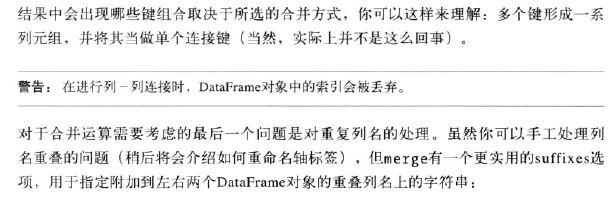

In [15]:
Image(filename="picture\Combining and Merging Data Sets 2.png")

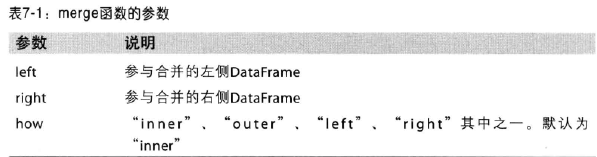

In [17]:
Image(filename="picture\Combining and Merging Data Sets 3.png")

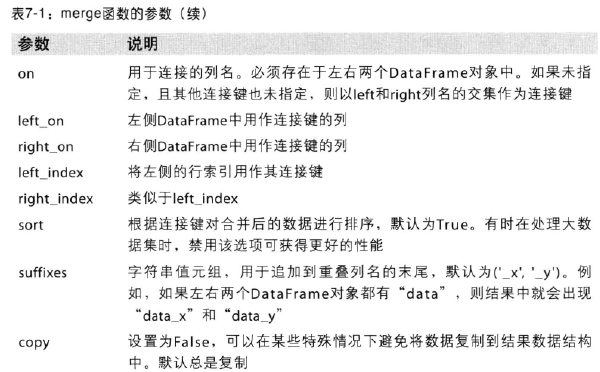

In [16]:
Image(filename="picture\Combining and Merging Data Sets 4.png")

### 2 索引上的合并

In [20]:
left1 = DataFrame({'key':['a','b','a','a','b','c'],
                'value':range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

print left1
print right1

print pd.merge(left1, right1, left_on='key', right_index=True)
print pd.merge(left1, right1, left_on='key', right_index=True,how='outer')

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN



In [26]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
 'key2': [2000, 2001, 2002, 2001, 2002],
 'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
 index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
 [2001, 2000, 2000, 2000,2001, 2002]],
 columns=['event1', 'event2'])

print lefth
print righth

print pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True) # 注意重复索引的处理
print pd.merge(lefth, righth, left_on=['key1', 'key2'],right_index=True, how='outer')

   data    key1  key2
0     0    Ohio  2000
1     1    Ohio  2001
2     2    Ohio  2002
3     3  Nevada  2001
4     4  Nevada  2002
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11
   data    key1  key2  event1  event2
0     0    Ohio  2000       4       5
0     0    Ohio  2000       6       7
1     1    Ohio  2001       8       9
2     2    Ohio  2002      10      11
3     3  Nevada  2001       0       1
   data    key1  key2  event1  event2
0     0    Ohio  2000       4       5
0     0    Ohio  2000       6       7
1     1    Ohio  2001       8       9
2     2    Ohio  2002      10      11
3     3  Nevada  2001       0       1
4     4  Nevada  2002     NaN     NaN
4   NaN  Nevada  2000       2       3



In [31]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

print left2
print right2

print left2.join(right2, how='outer')
print left1.join(right1, on='key')

   Ohio  Nevada
a     1       2
c     3       4
e     5       6
   Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14
   Ohio  Nevada  Missouri  Alabama
a     1       2       NaN      NaN
b   NaN     NaN         7        8
c     3       4         9       10
d   NaN     NaN        11       12
e     5       6        13       14
  key  value  group_val
0   a      0        3.5
1   b      1        7.0
2   a      2        3.5
3   a      3        3.5
4   b      4        7.0
5   c      5        NaN


In [32]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
 index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

print another
print left2.join([right2, another])
print left2.join([right2, another], how='outer')

   New York  Oregon
a         7       8
c         9      10
e        11      12
f        16      17
   Ohio  Nevada  Missouri  Alabama  New York  Oregon
a     1       2       NaN      NaN         7       8
c     3       4         9       10         9      10
e     5       6        13       14        11      12
   Ohio  Nevada  Missouri  Alabama  New York  Oregon
a     1       2       NaN      NaN         7       8
b   NaN     NaN         7        8       NaN     NaN
c     3       4         9       10         9      10
d   NaN     NaN        11       12       NaN     NaN
e     5       6        13       14        11      12
f   NaN     NaN       NaN      NaN        16      17


### 3 轴向连接
* 连接（concatenation）、绑定（binding）、堆叠（stacking）

In [33]:
arr = np.arange(12).reshape((3,4))

print arr
print np.concatenate([arr,arr],axis = 1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]


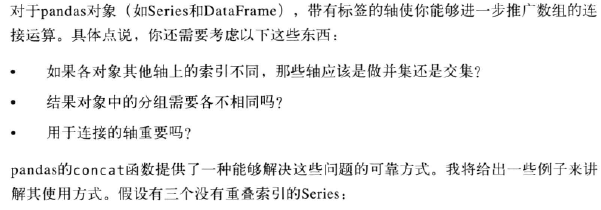

In [35]:
Image(filename="picture\Concatenation.png")

In [40]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

print s1
print s2
print s3

print pd.concat([s1,s2,s3]) # 将值和索引粘合在一起
print pd.concat([s1,s2,s3],axis = 1) 

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64
a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64
    0   1   2
a   0 NaN NaN
b   1 NaN NaN
c NaN   2 NaN
d NaN   3 NaN
e NaN   4 NaN
f NaN NaN   5
g NaN NaN   6


In [42]:
s4 = pd.concat([s1 * 5, s3])

print s4
print pd.concat([s1, s4], axis=1)
print pd.concat([s1, s4], axis=1, join='inner')
print pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

print result
print result.unstack()
print pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

a    0
b    5
f    5
g    6
dtype: int64
    0  1
a   0  0
b   1  5
f NaN  5
g NaN  6
   0  1
a  0  0
b  1  5
    0   1
a   0   0
c NaN NaN
b   1   5
e NaN NaN
one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64
        a   b   f   g
one     0   1 NaN NaN
two     0   1 NaN NaN
three NaN NaN   5   6
   one  two  three
a    0  NaN    NaN
b    1  NaN    NaN
c  NaN    2    NaN
d  NaN    3    NaN
e  NaN    4    NaN
f  NaN  NaN      5
g  NaN  NaN      6


In [43]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
 columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
 columns=['three', 'four'])

print df1
print df2

print pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])
print pd.concat({'level1': df1, 'level2': df2}, axis=1) # 传入 字典
print pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],names=['upper', 'lower']) # 层次化索引

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8
  level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8
  level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8
upper level1     level2     
lower    one two  three four
a          0   1      5    6
b          2   3    NaN  NaN
c          4   5      7    8


In [44]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

print df1
print df2

print pd.concat([df1, df2], ignore_index=True)

          a         b         c         d
0 -0.237009  0.797732 -1.104794  0.008295
1 -0.439155 -0.467090  0.546519  0.561466
2 -2.011739 -0.410485 -1.439417  0.597892
          b         d         a
0 -1.189609  1.998985 -0.001541
1 -1.643742  0.506527 -0.328351
          a         b         c         d
0 -0.237009  0.797732 -1.104794  0.008295
1 -0.439155 -0.467090  0.546519  0.561466
2 -2.011739 -0.410485 -1.439417  0.597892
3 -0.001541 -1.189609       NaN  1.998985
4 -0.328351 -1.643742       NaN  0.506527


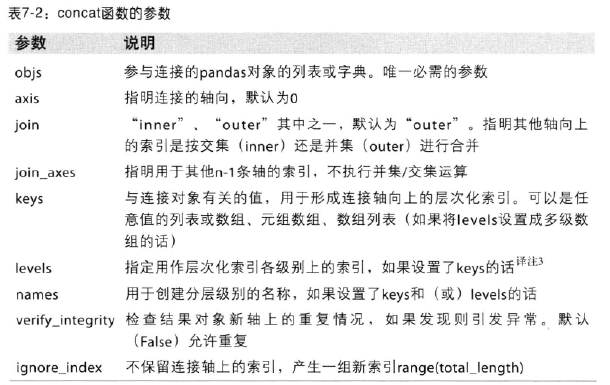

In [46]:
Image(filename="picture\Concatenation 2.png")

### 4 合并重叠数据

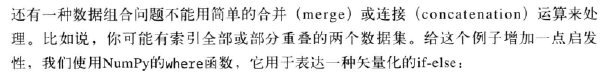

In [47]:
Image(filename="picture\Combining Data with Overlap.png")

In [51]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),index=['f', 'e', 'd', 'c', 'b', 'a'])

print a
print b

b[-1] = np.nan
print b

print b[:-2].combine_first(a[2:])

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64
f    0
e    1
d    2
c    3
b    4
a    5
dtype: float64
f     0
e     1
d     2
c     3
b     4
a   NaN
dtype: float64
a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64




In [52]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
 'b': [np.nan, 2., np.nan, 6.],
 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
 'b': [np.nan, 3., 4., 6., 8.]})

print df1
print df2
print df1.combine_first(df2)

    a   b   c
0   1 NaN   2
1 NaN   2   6
2   5 NaN  10
3 NaN   6  14
    a   b
0   5 NaN
1   4   3
2 NaN   4
3   3   6
4   7   8
   a   b   c
0  1 NaN   2
1  4   2   6
2  5   4  10
3  3   6  14
4  7   8 NaN
